# 1. Поднимем pip и установим все зависимости

In [1]:
# в Colab используйте магию %pip для установки в правильное окружение
# 1) Сборка последней версии transformers из исходников:
!pip install --upgrade pip
!pip install git+https://github.com/huggingface/transformers accelerate
# 2) Утилиты для VL:
!pip install qwen-vl-utils[decord]==0.0.8

# Install missing dependency
!pip install gekko

# 3) Наш пакет и зависимости:
%cd /content
!git clone https://github.com/Mike030668/ranger_generation.git
!pip install -e . \
    --no-deps \
    transformers sentencepiece auto-gptq peft accelerate huggingface-hub \
    diffusers safetensors tqdm pillow qwen-vl-utils

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-bjp8x177
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-bjp8x177
  Resolved https://github.com/huggingface/transformers to commit 4b47b2b8ea9252e36669397243b770505f953d69
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
  Created wheel for transformers: filename=transformers-4.54.0.dev0-py3-none-any.whl size=11836127 sha256=88d802709af738097810f4a31fbf0b7296c31da205c1b73a539254bdfdcfffa0
  Stored in 

Тестовые челоыечески промпты

- «Сберкот анфас в тёплом золотом свете на закате»
- «Портрет девушки анфас в киновизуальном стиле на фоне городского пейзажа»
- «Кошка-астронавт крупным планом при мягком золотом освещении»
- “A front-view portrait of a vintage car in cinematic color grading during golden hour”
- “Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style”

# Flux

In [6]:
# в Colab-ячейке
!pip install huggingface_hub --quiet
!huggingface-cli login --token put_your_token_here


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `Colab reaad` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `Colab reaad`


In [ ]:
%cd /content//ranger_generation
!pip install -e . --quiet
!python3 scripts/demo_flux.py \
  "Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style" \
  -n 2 -W 512 -H 512 -s 30 -g 3.5 \
  --seeds 222,333 \
  -o "./test_gen/out_demo_flux.png"

from IPython.display import Image, display
display(Image("./test_gen/out_demo_flux.png"))


/content/ranger_generation
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ranger_generation (pyproject.toml) ... done


## use_qwen

/content/ranger_generation
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ranger_generation (pyproject.toml) ... done
2025-07-11 06:39:59.198940: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 06:39:59.216613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752215999.237865   11363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:175221

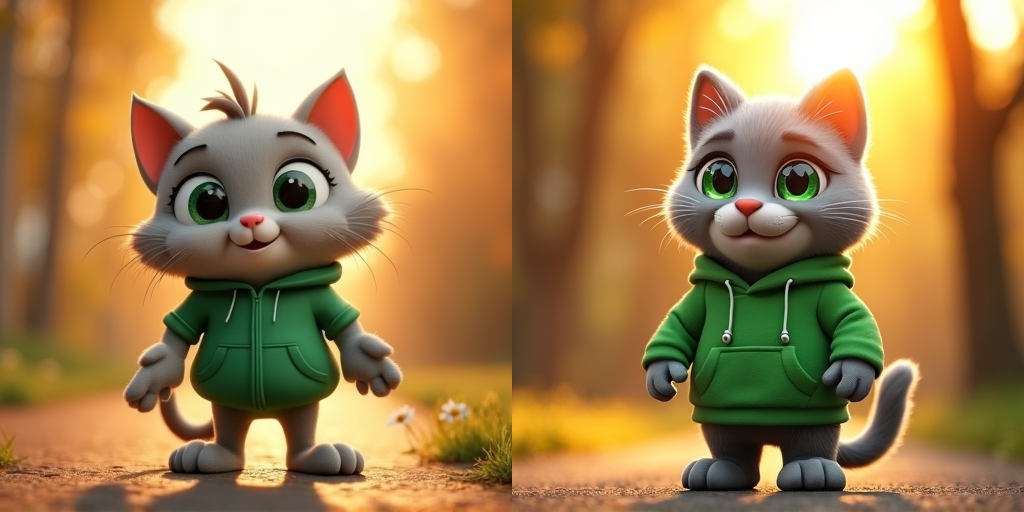

In [12]:
# Qwen + Flux without negative:
%cd /content//ranger_generation
!pip install -e . --quiet
!python3 scripts/demo_qwen_flux.py \
  "Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style" \
  --use_qwen \
  -n 2 -W 512 -H 512 -s 30 -g 3.5 \
  --seeds 222,333 \
  -o "./test_gen/out_qwen_flux.png"


from IPython.display import Image, display
display(Image("./test_gen/out_qwen_flux.png"))

## use_qwen & use_negative

2025-07-11 06:43:23.575112: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 06:43:23.630654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752216203.652054   12314 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752216203.658655   12314 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-11 06:43:23.687078: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

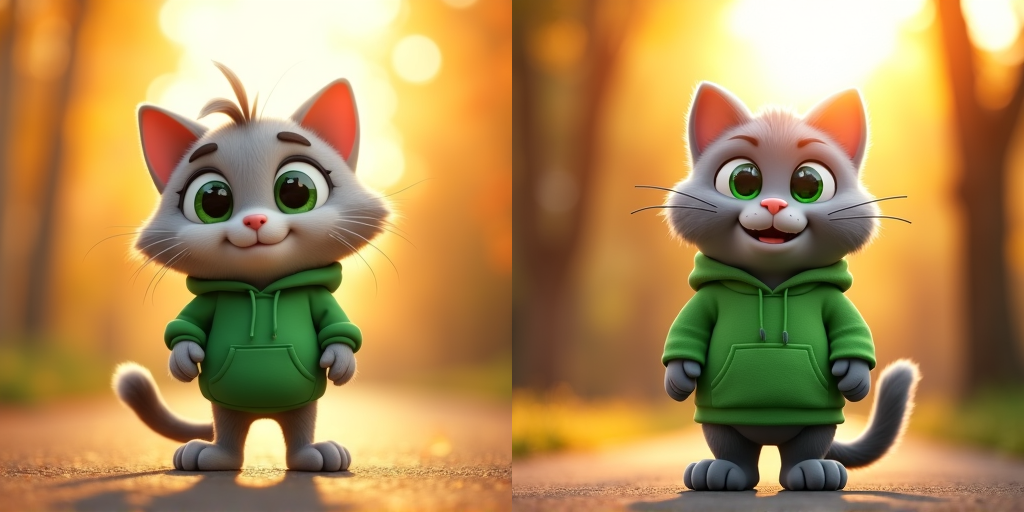

In [13]:
# Qwen + Flux without negative:
!python3 scripts/demo_qwen_flux.py \
  "Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style" \
  --use_qwen --use_negative \
  -n 2 -W 512 -H 512 -s 30 -g 3.5 \
  --seeds 222,333 \
  -o "./test_gen/out_qwen_flux_with_neg.png"


from IPython.display import Image, display
display(Image("./test_gen/out_qwen_flux_with_neg.png"))

In [ ]:
# Get the contents of the requirements.txt file
with open('requirements.txt', 'r') as f:
  requirements = f.readlines()

# Remove the line containing the transformers dependency
requirements = [req for req in requirements if not req.strip().startswith('transformers@')]

# Write the modified requirements back to the file
with open('requirements.txt', 'w') as f:
  f.writelines(requirements)

In [ ]:
# Install the rest of the requirements
!pip install -r requirements.txt

# Install a stable version of transformers separately
!pip install transformers==4.30.2 # You can change this version if needed

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
  Cloning https://github.com/huggingface/transformers (to revision f69d38772a627a9e8e15d60c70e189359573662b) to /tmp/pip-install-rufyb0qq/transformers_ec7bc0353be446d1b1c5db1ffb07fb15
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-install-rufyb0qq/transformers_ec7bc0353be446d1b1c5db1ffb07fb15
  Running command git rev-parse -q --verify 'sha^f69d38772a627a9e8e15d60c70e189359573662b'
  Running command git fetch -q https://github.com/huggingface/transformers f69d38772a627a9e8e15d60c70e189359573662b
  fatal: remote error: upload-pack: not our ref f69d38772a627a9e8e15d60c70e189359573662b
  error: subprocess-exited-with-error
  
  × git fetch -q https://github.com/huggingface/transformers f69d38772a627a9e8e15d60c70e189359573662b did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subproces